In [1]:
#Here we have imported various libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Data Input

In [2]:
#Here we will to import the dataset
df = pd.read_csv("dm_train.csv")

In [3]:
print (df.shape)
#Here we will check the shape of the dataset to know the shape i.e. the number of rows and columns

(891, 12)


In [4]:
#Here we will get to know the heading of the columns of our dataset
print (df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Basic head view of the dataset

In [5]:
df.head() #This represents the head of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#This helps to show the informatioon of the datafrase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Here are checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above, we can see that there are three heads where the values are numll, i.e There are 177 values missing in Age, 687 values missing in Cabin and 2 values missing in Embarked

# Data Description

In [8]:
#Here are checking the overall statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives us a Data Description of all the numerical data

# Data Summary

In [9]:
#Number of people who survived
df[df["Survived"]==1]["Survived"].value_counts()

1    342
Name: Survived, dtype: int64

In [10]:
#This helps us to get the percentage of people who survived 
print(round(df[df["Survived"]==1]["Survived"].value_counts()/df.shape[0]*100,2))

1    38.38
Name: Survived, dtype: float64


Out of 891, 342 people survived which is 38.38% of the entire population

In [11]:
#Here we are grouping on the basis of Sex and Survived to get the number of persons who survived or not
df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Titanic Tragedy Survived ot Not')

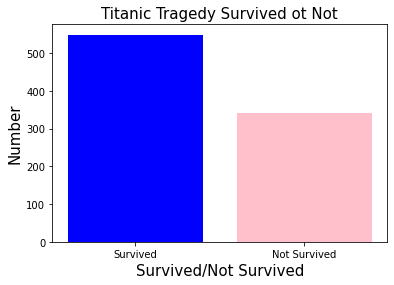

In [12]:
Survived = df["Survived"].value_counts()[0]
NotSurvived = df["Survived"].value_counts()[1]
plt.bar(["Survived","Not Survived"], [Survived,NotSurvived], color=["Blue","Pink"])
plt.xlabel('Survived/Not Survived', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.title("Titanic Tragedy Survived ot Not", fontsize=15)

In [13]:
#Here we know the percentage of male and female in the entire population
round(df["Sex"].value_counts()/df.shape[0]*100,2)

male      64.76
female    35.24
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Titanic Tragedy Passenger Gender')

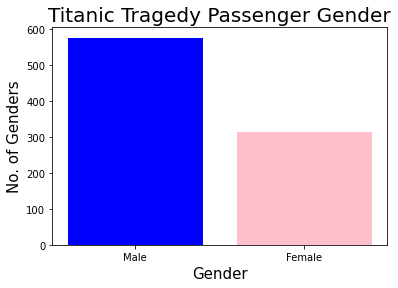

In [14]:
Male = df["Sex"].value_counts()["male"]
Female = df["Sex"].value_counts()["female"]
plt.bar(["Male","Female"], [Male,Female], color=["Blue","Pink"])
plt.xlabel('Gender', fontsize=15)
plt.ylabel('No. of Genders', fontsize=15)
plt.title('Titanic Tragedy Passenger Gender', fontsize=20)

Text(0.5, 1.0, 'Titanic Tragedy Passenger Class')

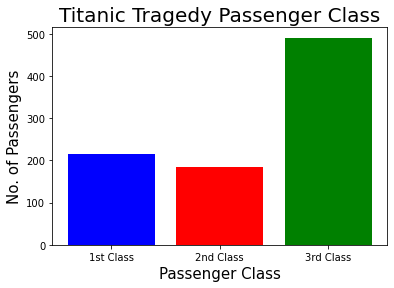

In [15]:
# Plotting a bar chart showing the distrinution of "number" of people travelling in different classes(Pclass)
Class1 = df['Pclass'].value_counts()[1]
Class2 = df['Pclass'].value_counts()[2]
Class3 = df['Pclass'].value_counts()[3]
plt.bar(["1st Class","2nd Class","3rd Class"], [Class1,Class2,Class3], color=["Blue","Red","Green"])


plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('No. of Passengers', fontsize=15)
plt.title('Titanic Tragedy Passenger Class', fontsize=20)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

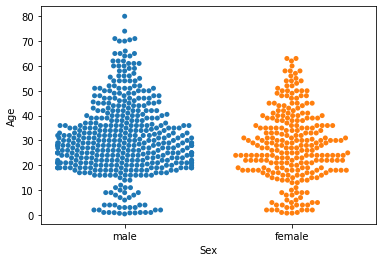

In [16]:
# Here we are plotting a swarm plot on age
sns.swarmplot(x='Sex', data=df, y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

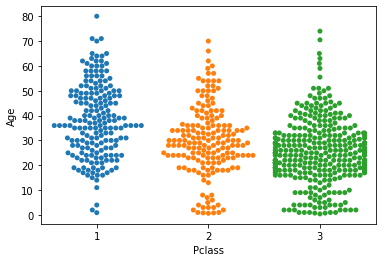

In [17]:
sns.swarmplot(x='Pclass', data=df, y='Age')

<AxesSubplot:>

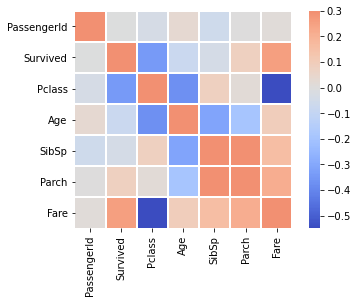

In [18]:
sns.heatmap(df[["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr(),cmap="coolwarm",vmax=0.3, center=0,square=True,linewidth=0.5)